In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
import matplotlib.pyplot as plt

In [2]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [3]:
train_df = pd.read_csv(DATA_URL+"/titanic_train.csv", index_col="PassengerId")

In [4]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe(include="all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Peter, Mrs. Catherine (Catherine Rizk)",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Let's dropCabin, and then – all rows with missing values.

In [7]:
train_df = train_df.drop("Cabin", axis=1).dropna()

In [8]:
train_df.shape

(712, 10)

1. Build a picture to visualize all scatter plots for each pair of features Age, Fare, SibSp, Parch and Survived. ( scatter_matrix from Pandas or pairplot from Seaborn)

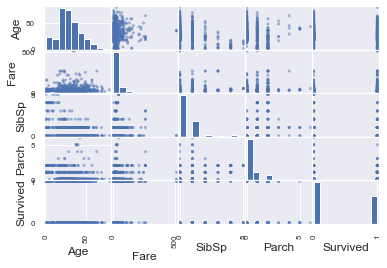

In [12]:
pd.plotting.scatter_matrix(train_df[["Age", "Fare", "SibSp", "Parch", "Survived"]]);

2. How does ticket price (Fare) depend on Pclass? Build a boxplot.

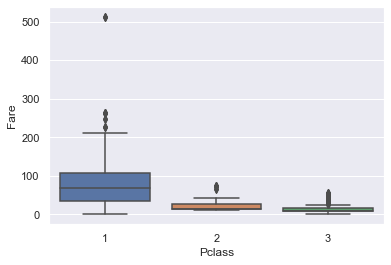

In [22]:

sns.boxplot(x="Pclass", y="Fare", data=train_df);

3. Let's build the same plot but restricting values of Fare to be less than 95% quantile of the initial vector (to drop outliers that make the plot less clear).

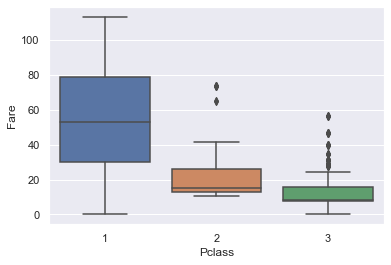

In [21]:
sns.boxplot(
    x="Pclass",
    y="Fare",
    data=train_df[train_df["Fare"] < train_df["Fare"].quantile(0.95)],
);

4. How is the percentage of survived passengers dependent on passengers' gender? Depict it with Seaborn.countplot using the hue argument.

In [24]:
pd.crosstab(train_df["Sex"], train_df["Survived"])

Survived,0,1
Sex,,
female,64,195
male,360,93


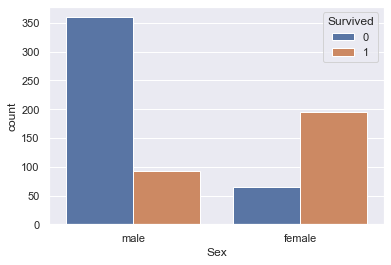

In [23]:
sns.countplot(x="Sex", hue="Survived", data=train_df);

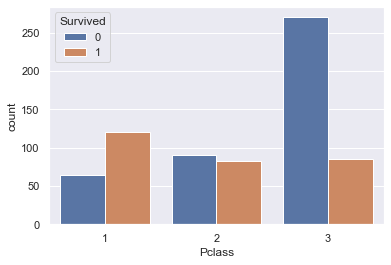

In [25]:
sns.countplot(x="Pclass", hue="Survived", data=train_df);

5. How does the distribution of ticket prices differ for those who survived and those who didn't. Depict it with Seaborn.boxplot

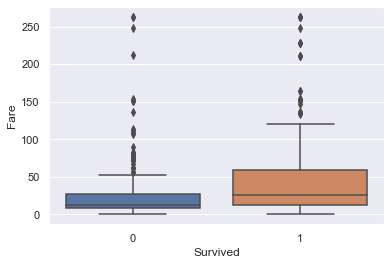

In [29]:
sns.boxplot(x="Survived", y="Fare", data=train_df[train_df["Fare"] < 500]);